DEV NOTEBOOK
---

Bike sharing model evaluation
---

Exercise: Load train/test sets
---

> **Exercise**: Load the train/test sets into the `train_df`/`test_df` DataFrames. Create the x/y Numpy arrays from the `temp` and `users` columns. Plot the data points.

In [2]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import HuberRegressor
from sklearn.dummy import DummyRegressor

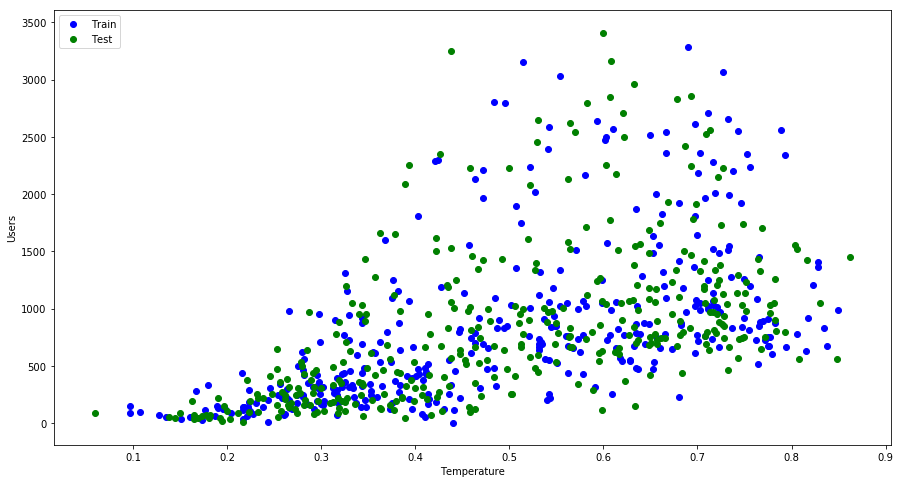

In [9]:
# Load data sets
train_df = pd.read_csv('./data/bike-train.csv')
test_df = pd.read_csv('./data/bike-test.csv')

# Create x/y Numpy arrays
x_train = train_df.temp.values
y_train = train_df.users.values

x_test = test_df.temp.values
y_test = test_df.users.values

def drawBaseGraph(list_of_plots):
    # Plot data points
    plt.figure(figsize=(15,8))

    for plots in list_of_plots:
        x,y,color,label = plots
        plt.scatter(x,y,c=color,label=label)
    #plt.scatter(x_train,y_train,c='b',label="Train")
    #plt.scatter(x_test,y_test,c='y',label="Test")

    plt.legend(loc="upper left")
    plt.xlabel("Temperature")
    plt.ylabel("Users")

drawBaseGraph([(x_train,y_train,'b',"Train"),(x_test,y_test,'g',"Test")])
plt.show()


Exercise: Fit and compare different models
---

> **Exercise**: (A) Fit several models to the train data and evaluate their performance on the test set using MAE. (B) Remove the outliers with the z-scores. (C) Create a baseline model and do a final model comparison using a bar chart.

Some ideas: Linear regression, polyfit with different degrees, linear regression with Huber loss, linear regression without outliers, polyfit without outliers.

In [7]:
# Define the MAE cost function
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

MAE for linear regression (deg = 1) = 417
MAE for linear regression (deg = 2) = 419
MAE for linear regression (deg = 3) = 407
MAE for linear regression (deg = 4) = 407
MAE for linear regression (deg = 5) = 407


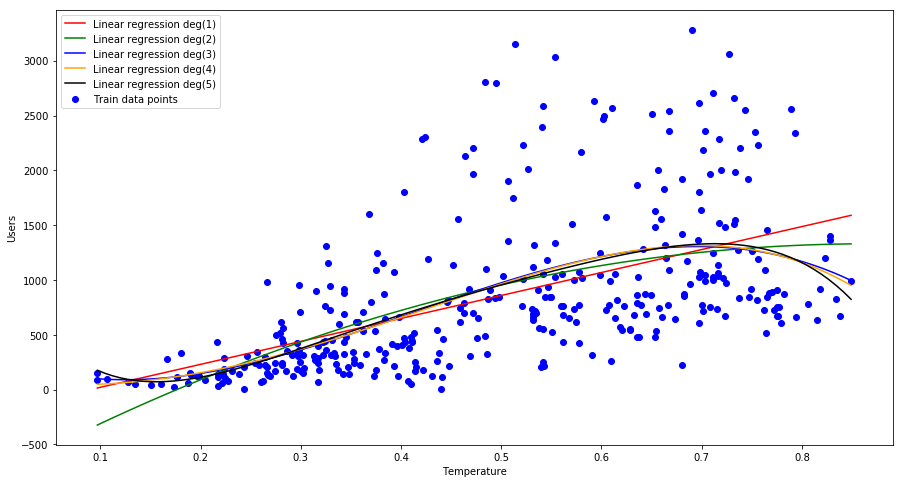

In [31]:
# (A) Test different models

x = x_train
y = y_train

x_values = np.linspace(x.min(),x.max(),num=100)
colormap= {
    1: 'r',
    2: 'g',
    3: 'b',
    4: 'orange',
    5 :'black'
}

drawBaseGraph([(x_train,y_train,'b',"Train data points")])

# Linear regression
for i in range(1,6):
    coef_poly = np.polyfit(x,y,deg=i)
    y_poly = np.polyval(coef_poly, x_values)
    plt.plot(x_values, y_poly, c=colormap[i],label="Linear regression deg(" + str(i) + ")")
    print("MAE for linear regression (deg = " + str(i) + ") =",int(MAE(y_train,np.polyval(coef_poly,x))))
  

plt.legend()
plt.show()

In [ ]:
# (B) Remove outliers
...

In [ ]:
# (C) Final comparison
...